In [1]:
import sys, os
protomshome = os.environ["PROTOMSHOME"]
sys.path.append(protomshome +"/tools")
import calc_gci as cg

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

# Comparison of analytical GCMC free energies with GCI

If the excess free energies to insert $N$ particles into a system are known for all $N$, the average number of particles for a give Adams value $B$ is given by


$$\langle N \rangle(B) = \frac{\sum_{N=0}^\infty N\exp(NB - F_\text{ex}(N)\beta  - \ln(N!))}{\sum_{N=0}^\infty \exp(NB - F_\text{ex}(N)\beta  - \ln(N!))}$$

Where $F_\text{ex}(N)$ is the excess free energy to insert $N$ particles.

The grand canonical integration (GCI) equation relates the area under $\langle N \rangle(B)$ to differences in the excess free energies:

$$\beta(F_\text{trans}(N_f) - F_\text{trans}(N_i))  =  \langle N_f \rangle B_f -  \langle N_i\rangle B_i + \ln \left(\frac{\langle N_i \rangle !}{ \langle N_f\rangle !}\right) - \int_{B_i}^{B_f}  \langle N(B) \rangle d B$$

This notebook compares the free energies calculated with GCI to the free energies in $\langle N \rangle(B)$ for analytical systems that can bind mutliple particles. Excellent numerical agreement is found between both equations. This supports the notion that the GCI equation correctly calculates excess free energies for many body systems.

First defining the functions necessary for the numerical comparison:

In [2]:
from scipy import integrate
from scipy import special
from scipy import interpolate

def gci(B, N, kT=0.592):
    """
    Calculates the insertion free energy using grand canonical integration for an 
    input titration curve.

    Parameters
    ----------
    B : numpy array
      Adams values
    N : numpy array
      The average number of particles at a given B
    kT : float
      the thermal energy

    Returns
    -------
    F : float
      relative ideal gas transfer free energies
    """
    def nonintegral(N,B):
        return N*B - special.gammaln(N+1)
    
    def nonintegral_sterling(N,B):
        return N*B - N*(np.log(N)-1)
    
    titration = interpolate.interp1d(B, N, kind='cubic')
    
    #F = (nonintegral_sterling(N[-1],B[-1]) - nonintegral_sterling(N[0],B[0]) - integrate.quad(titration,a=B[0],b=B[-1])[0])
    F = (nonintegral(N[-1],B[-1]) - nonintegral(N[0],B[0]) - integrate.quad(titration,a=B[0],b=B[-1])[0])
    F = F*kT
    return F


def N_onesite(B, F,kT=0.592):
    """
    Titration curve for a system that can bind only one particle.

    Parameters
    ----------
    B  : numpy array
      Adams values over which the average number of particles will be calculated
    F : float
      excess free energy to add particle to system
    kT : float
      the thermal energy

    Returns
    -------
    N : numpy array
      the average number of particles as a function of B
    """
    return 1.0/(1 + np.exp(F/kT - B) 
               )
def N_twosite(B,F1,F2,kT=0.592):
    """
    Titration curve for a system that can bind only 2 particles. The free energy to insert all particles is given by 
    the sum over the free energies to insert each individual particle

    Parameters
    ----------
    B  : numpy array
      Adams values over which the average number of particles will be calculated
    F1 : float
      excess free energy to add the first particle to system
    F2 : float
      excess free energy to add the second particle to system
    kT : float
      the thermal energy

    Returns
    -------
    N : numpy array
      the average number of particles as a function of B
    """
    numerator = np.exp(B - F1/kT) + 2*np.exp(2*B - (F1 + F2)/kT - np.log(2))
    denominator = 1 + np.exp(B - F1/kT) + np.exp(2*B - (F1 + F2)/kT - np.log(2))
    return numerator/denominator

def N_threesite(B,F1,F2,F3,kT=0.592):
    """
    Titration curve for a system that can bind only 2 particles. The free energy to insert all particles is given by 
    the sum over the free energies to insert each individual particle

    Parameters
    ----------
    B  : numpy array
      Adams values over which the average number of particles will be calculated
    F1 : float
      excess free energy to add the first particle to system
    F2 : float
      excess free energy to add the second particle to system
    F3 : float
      excess free energy to add the third particle to system
    kT : float
      the thermal energy

    Returns
    -------
    N : numpy array
      the average number of particles as a function of B
    """
    numerator = np.exp(B - F1/kT) + 2*np.exp(2*B - (F1 + F2)/kT - np.log(2)) + 3*np.exp(3*B - (F1 + F2 + F3)/kT - np.log(6)) 
    denominator = 1 + np.exp(B - F1/kT) + np.exp(2*B - (F1 + F2)/kT - np.log(2)) + np.exp(3*B - (F1 + F2 + F3)/kT - np.log(6)) 
    return numerator/denominator

def N_foursite(B,F1,F2,F3,F4,kT=0.592):
    """
    Titration curve for a system that can bind only 2 particles. The free energy to insert all particles is given by 
    the sum over the free energies to insert each individual particle

    Parameters
    ----------
    B  : numpy array
      Adams values over which the average number of particles will be calculated
    F1 : float
      excess free energy to add the first particle to system
    F2 : float
      excess free energy to add the second particle to system
    F3 : float
      excess free energy to add the third particle to system
    F4 : float
      excess free energy to add the fourth particle to system
    kT : float
      the thermal energy

    Returns
    -------
    N : numpy array
      the average number of particles as a function of B
    """
    numerator = np.exp(B - F1/kT) + 2*np.exp(2*B - (F1 + F2)/kT - np.log(2)) + 3*np.exp(3*B - (F1 + F2 + F3)/kT - np.log(6)) + 4*np.exp(4*B - (F1 + F2 + F3 + F4)/kT - np.log(24)) 
    denominator = 1 + np.exp(B - F1/kT) + np.exp(2*B - (F1 + F2)/kT - np.log(2)) + np.exp(3*B - (F1 + F2 + F3)/kT - np.log(6)) + np.exp(4*B - (F1 + F2 + F3 + F4)/kT - np.log(24)) 
    return numerator/denominator

def N_nsite(B,nsites,F,kT=0.592):
    """
    Titration curve for a system that can bind a number particles. The free energy to insert all particles is given by 
    the sum over the free energies to insert each individual particle

    Parameters
    ----------
    B  : numpy array
      Adams values over which the average number of particles will be calculated
    nsites  : int
      the number of sites to consider
    F  : list
      free energies to insert each individual particle
    kT : float
      the thermal energy

    Returns
    -------
    N : numpy array
      the average number of particles as a function of B
    """
    F_sum = np.cumsum(F)/kT
    if nsites != len(F):
        print 'Number of sites (nsites) must equal the number of site specific free energies'
        pass
    integers = np.arange(start=1,stop=nsites+1)
    lnfactorials = special.gammaln(integers+1)
    N = np.zeros(len(B))
    for i in range(len(B)):
        numerator = np.sum(integers*np.exp(integers*B[i] - F_sum - lnfactorials))
        denominator = 1 + np.sum(np.exp(integers*B[i] - F_sum - lnfactorials)) 
        N[i] = numerator/denominator
    return N

Testing the consistency of the individual titration curve functions for one site, two sites, three sites, and four sites to the general function for any number of sites (`N_site`):

In [3]:
B = np.linspace(-50,-0,50) 


F = [-15]
print np.sum((N_nsite(B,1,F) - N_onesite(B,F[0]))**2)

F = [-10,-3]
print np.sum((N_nsite(B,2,F) - N_twosite(B,F[0],F[1]))**2)

F = [-15,-5,-2]
print np.sum( (N_nsite(B,3,F) - N_threesite(B,F[0],F[1],F[2]))**2)

F = [-15,-5,-2,-10]
print np.sum( (N_nsite(B,4,F) - N_foursite(B,F[0],F[1],F[2],F[3]))**2)

1.48733713295e-31
6.16373989337e-33
3.14167322178e-33
3.14167322178e-33


General function `N_site()` expression matches the individual titration curves functions.

Moving on to comparisons to GCI:

## Single site

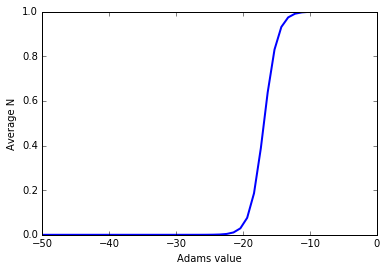

In [4]:
F = -10
B = np.linspace(-50,-0,50) 
N = N_onesite(B,F)

plt.plot(B,N,linewidth=2)
plt.xlabel('Adams value')
plt.ylabel('Average N')
plt.show()

In [5]:
print 'Total analytical free energy = {0} kcal/mol'.format(F)
print 'Free energy estimated with GCI = {0} kcal/mol'.format(gci(B,N))

Total analytical free energy = -10 kcal/mol
Free energy estimated with GCI = -10.0000000051 kcal/mol


## Two sites

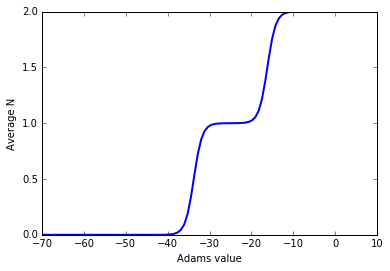

In [6]:
F1 = -20
F2 = -10
B = np.linspace(-70,10,100)
N = N_twosite(B,F1,F2)

plt.plot(B,N,linewidth=2)
plt.xlabel('Adams value')
plt.ylabel('Average N')
plt.show()

In [7]:
print 'Total analytical free energy = {0} kcal/mol'.format(F1+F2)
print 'Free energy estimated with GCI = {0} kcal/mol'.format(gci(B,N))

Total analytical free energy = -30 kcal/mol
Free energy estimated with GCI = -30.0000000401 kcal/mol


## Three site

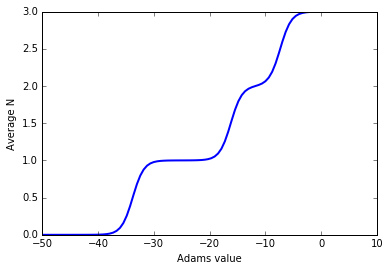

In [8]:
F1 = -20
F2 = -10
F3 = -5
B = np.linspace(-50,10,100)
N = N_threesite(B,F1,F2,F3)

plt.plot(B,N,linewidth=2)
plt.xlabel('Adams value')
plt.ylabel('Average N')
plt.show()

In [9]:
print 'Total analytical free energy = {0} kcal/mol'.format(F1+F2+F3)
print 'Free energy estimated with GCI = {0} kcal/mol'.format(gci(B,N))

Total analytical free energy = -35 kcal/mol
Free energy estimated with GCI = -34.9999974843 kcal/mol


## Four site

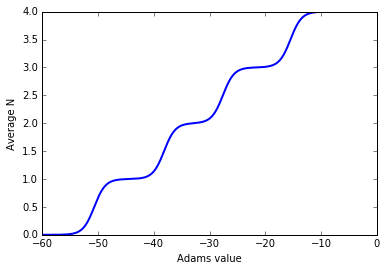

In [10]:
F1 = -30
F2 = -23
F3 = -17
F4 = -10
B = np.linspace(-60,0,1000)
N = N_nsite(B,4,[F1,F2,F3,F4])
#N_pred = interpolate.interp1d(B, N, kind='cubic')
plt.plot(B,N,linewidth=2)
#plt.plot(B,N_pred(B))
plt.xlabel('Adams value')
plt.ylabel('Average N')
plt.show()

In [11]:
print 'Total analytical free energy = {0} kcal/mol'.format(F1+F2+F3+F4)
print 'Free energy estimated with GCI = {0} kcal/mol'.format(gci(B,N))

Total analytical free energy = -80 kcal/mol
Free energy estimated with GCI = -79.9968085412 kcal/mol
